# Portfolio Assignment 2

## Part 1.
### Load  the 'divorce_margarine' dataset  from  the 'dslabs'package.  Investigate  the  correlation between  margarine  consumption  and  divorce  rates  in  Maine.  Would  an  increase  in  the preference for margarine lead to skyrocketing divorce rates

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("dslabs")

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data(divorce_margarine)

In [4]:
head(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


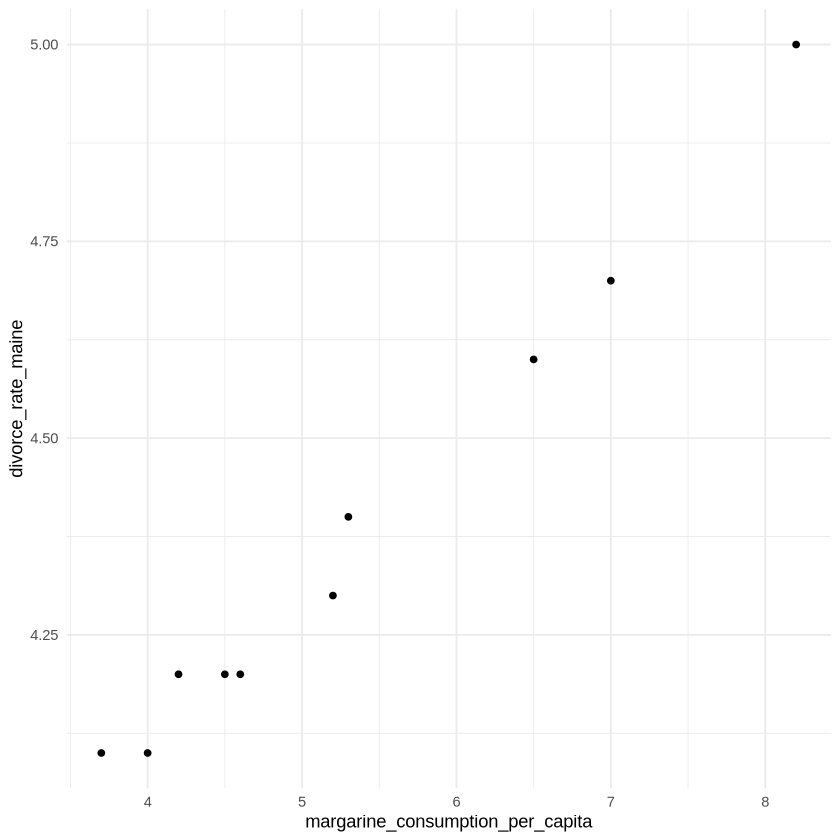

In [5]:
ggplot(divorce_margarine,
      aes(x=margarine_consumption_per_capita, y=divorce_rate_maine))+
    geom_point() +  
    theme_minimal()

In [6]:
#Model
lm(data =divorce_margarine,
   formula = divorce_rate_maine ~ margarine_consumption_per_capita) %>%
    summary()


Call:
lm(formula = divorce_rate_maine ~ margarine_consumption_per_capita, 
    data = divorce_margarine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05583 -0.01816 -0.01452  0.03601  0.04625 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.308626   0.048032   68.88 2.20e-12 ***
margarine_consumption_per_capita 0.201386   0.008735   23.05 1.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03841 on 8 degrees of freedom
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9833 
F-statistic: 531.5 on 1 and 8 DF,  p-value: 1.33e-08


The visualization of the data indicates that an increase in the preference for margarine could potentially lead to higher divorce rates in Maine. When looking at the model, the R^2 coefficient is 0.985, meaning that the model explains 98.5% of the variability in the data. Furthermore, the model indicates that a one unit increase in margarine consumption per capita will result in a ~0.2 unit higher divorce rate in Maine. 

However, this high correlation does not correspond to causation as it is very likely to be overfitting and spurious considering the small data set and no logical relationship between the variables. Thus, whether an increase in the preference for margarine lead to skyrocketing divorce rates should not be determined with this model considering the limitations of the data. 

# Part 2.
### Load the ‘GSSvocab’ dataset from the ‘car’ package. This dataset contains people’s scores on an English vocabulary test and includes demographic information.

### Filter for the year 1978 and remove rows with missing values (the function na.exclude()is one way to do this – check out the documentation!).



In [7]:
load("GSSvocab.RData")

In [8]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [9]:
#Filtering for only year 1978
dat1978 <- na.exclude(subset(GSSvocab, year == 1978))
        
# Investigating the new data
str(dat1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


### Is a person’s  score on the vocabulary test (‘vocab’) significantly impacted by their level  of education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the results.

`geom_smooth()` using formula = 'y ~ x'


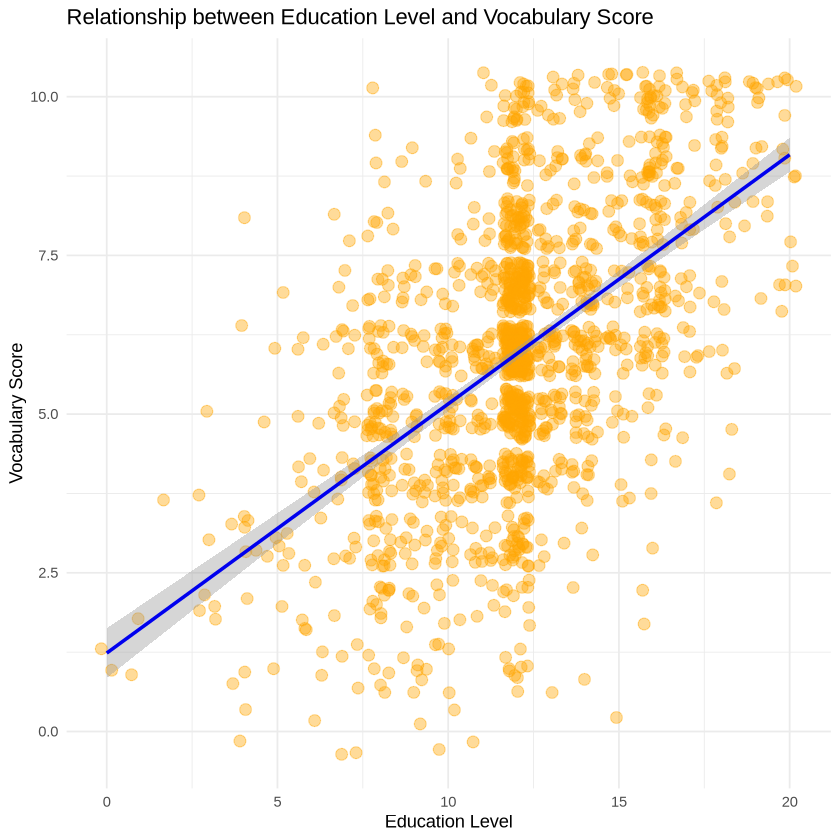

In [10]:
# Visualizing the relationship
ggplot(dat1978, aes(x = educ, y = vocab)) +
    geom_point(position = "jitter", color = "orange", size = 3, alpha = 0.4) +               
    geom_smooth(method = "lm", color = "blue2", se = TRUE) +               # Adding a regression line with confidence interval
    labs(
        title = "Relationship between Education Level and Vocabulary Score",
        x = "Education Level",
        y = "Vocabulary Score"
    ) +  
    theme_minimal()

In [11]:
# Building the model 
lm(data = dat1978,
   formula = vocab ~ educ) %>%
    summary()


Call:
lm(formula = vocab ~ educ, data = dat1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


The plot seems to indicate that an individual's vocubalurary test score increases with level of education. When looking at the model, we see that when education level increases with one unit (presumably year) the vocabulary test score increases with 0.39 indicating a positive correlation that additionally is is significant (p < 0.001). Although, the R^2 coefficient is 0.2883 meaning that only 28.83% of the variability in the data can be explained by the model. Thus, the model could be considered insufficient towards statements about education levels as a good predictor for vocabulary scores. 

### Whether a person is the native of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain theresults. 

`geom_smooth()` using formula = 'y ~ x'


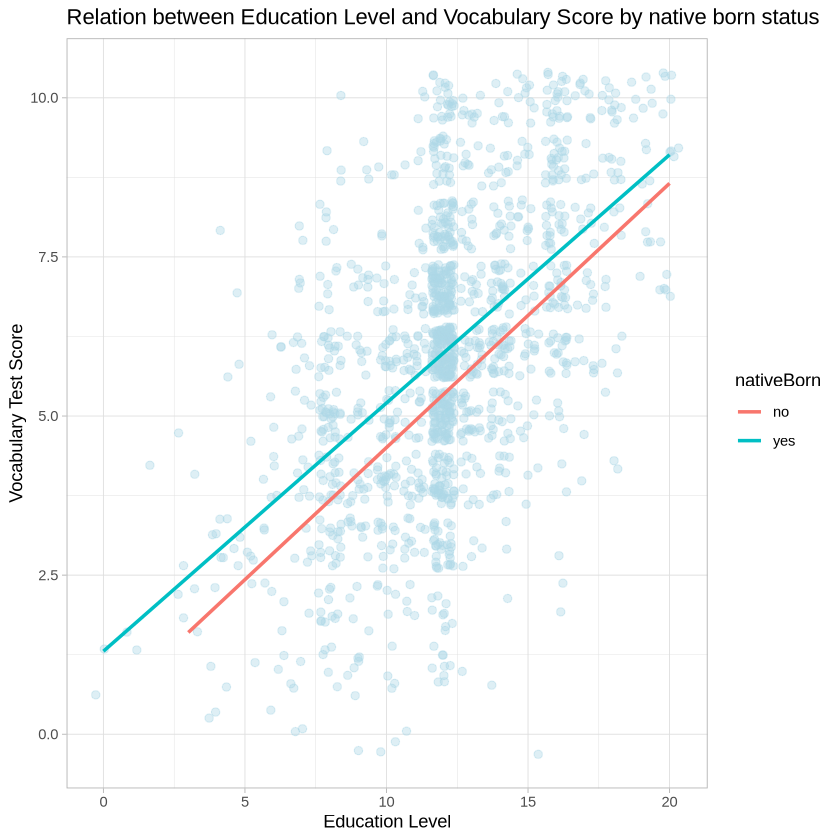

In [12]:
#Visualizing the data
ggplot(dat1978, 
       aes(x = educ, y = vocab, group = nativeBorn)) +
  geom_point(position = "jitter",  alpha = 0.4, color = "lightblue", size=2 ) +
  geom_smooth(method = lm, se = FALSE, aes(color = nativeBorn)) +
  theme_light() +
  labs(title = "Relation between Education Level and Vocabulary Score by native born status", 
       x = "Education Level", 
       y = "Vocabulary Test Score")



In [13]:
# Building the model 
lm(data = dat1978,
   formula = vocab ~ educ + nativeBorn) %>%
    summary()


Call:
lm(formula = vocab ~ educ + nativeBorn, data = dat1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


The plot indicates a slightly higher vocabulary test score for native born English-speaking individuals throughout education levels. The model estimates this correlation as a 0.65 higher vocabulary test score for individuals who are native born English-speakers. This correlation is significant (p < 0.01). However, the R^2 coefficient states that the model only accounts for 29.31% of the variability in the data. 

### Does  a  person’s  level  of  education  depend  on  whether they  are  a  native  of  the  country? Visualize the relationship. 

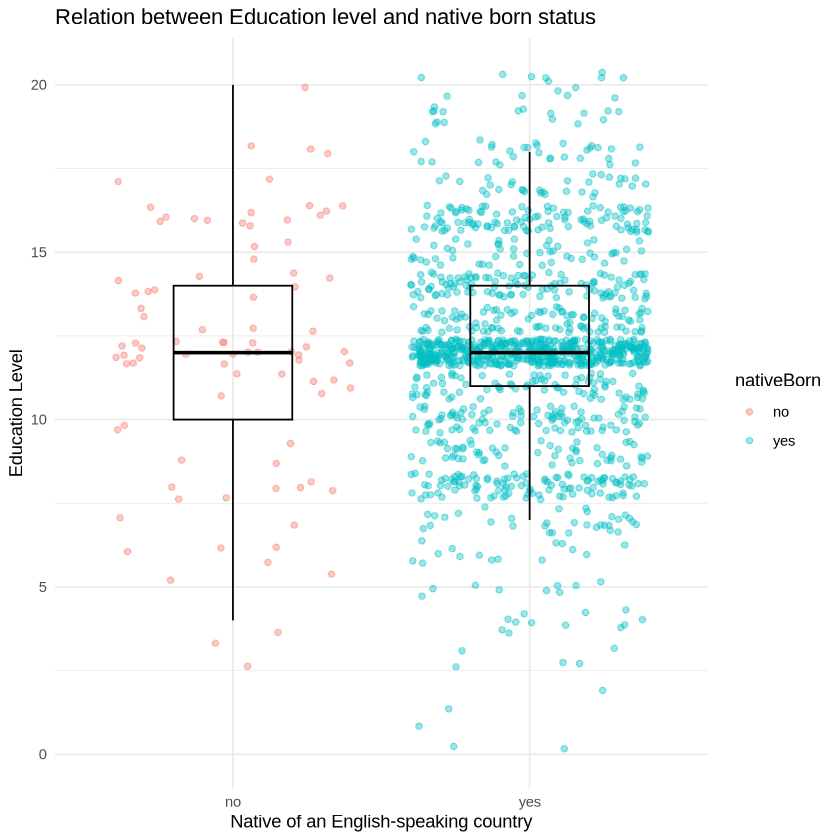

In [14]:
# Visualizing the relationship
ggplot(dat1978, 
       aes(x=nativeBorn, y=educ, color=nativeBorn))+
    geom_point(position="jitter", alpha=0.4)+
    geom_boxplot(width = 0.4, outlier.shape = NA, color = "black", fill = NA)+ 
    theme_minimal()+
    labs(title = "Relation between Education level and native born status", 
         x = "Native of an English-speaking country", 
         y = "Education Level")


Looking at the boxplot, the mean education levels seems to be similar for the two groups. However, there is more variance in the non-native group. Additionally, there are far more data points in the native-born group, where many are centered around the mean. But to see if level of education is influenced by native born status, we could include it as an interactionterm in the model. Doing this, would result in the education level being able to differ dependent on native born status. 

### Do you think it makes sense to add the relationship as an interactionterm? Try creating the model and briefly explain the results.

In [15]:
# Including the relationship as an interactionterm
   lm(data = dat1978,
   formula = vocab ~ educ * nativeBorn) %>%
    summary()


Call:
lm(formula = vocab ~ educ * nativeBorn, data = dat1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


To interpret the model: vocabulary test score ~ education level * native born status, 
the interaction between education level and vocabulary test score indicated by the model states that the effect of education level on vocabulary score is slightly smaller for native-born individuals compared to non-native born individuals estimate =-0.025). However, the model also indicates that education level is a significant predictor for vocubulary test score whereas native-born status and the interaction between education level and native-born status is not. 
The R^2 coefficient indicates that the model only account for 29.32% of the variability in the model. 
In conclusion, this interactionterm does not seem to increase the predictive power of the model. 


### Which model performs best?

To determine which model performs best, an ANOVA (analysis of variance) model comparison can be conducted:

In [16]:
m1 <- lm(vocab ~ educ, data = dat1978)
m2 <- lm(vocab ~ educ + nativeBorn, data = dat1978)
m3 <- lm(vocab ~ educ * nativeBorn, data = dat1978)

anova(m1, m2, m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


The ANOVA reveals that adding native-born status as a predictor in the model (i.e. vocabulary test score ~ education level + native-born status) significantly increases its ability to predict vocabulary test scores (p < 0.01). Model 3 (vocabulary test score ~ education level * native-born status) with the interactionterm is not a significant predictor for the vocubulary test scores (p = 0.663). 

In conclusion, when comparing the linear models - model 2 seems to perform best with its formula:

*vocabulary test score ~ education level + native-born status*
